# Analysis of hazardous asteroids' orbital parameters

Using data on already discovered asteroid's we'll try to analyse orbital parameters of hazardous asteroids and  find out orbits or familes of orbits with high probability of yet undiscovered potentially hazardous asteroids existance.

In [1]:
%matplotlib inline
import pickle, sys, os, time
import numpy as np
# import pandas as pd
import scipy.stats as ss

import read_database as rdb
import generate_orbits as go

### JPL ASTEROID DATABASE

**Load asteroid database:**

In [2]:
# database_path = "./asteroid_data/latest_fulldb.csv"

# if not os.path.exists(database_path):
#     database_url = "http://www.ianww.com/latest_fulldb.csv"
#     rdb.retrieve_database(database_url, database_path, jobtime=True)

columns = ['a', 'e', 'i', 'w', 'om', 'q', 'H', 'neo', 
               'pha', 'moid', 'per', 'n', 'ma', 'epoch']
# database = rdb.read_csv(database_path, sep=',', usecols=columns,
#                         low_memory=False, jobtime=True)

database = rdb.load_database(columns, jobtime=True)
database.head(n=5)

Loading asteroid database...
Asteroid database loaded in 5.894000 seconds.


,neo,pha,H,epoch,e,a,q,i,om,w,ma,n,per,moid
0,N,N,3.34,2457200.5,0.075783,2.767972,2.558208,10.592305,80.327198,72.654146,138.662175,0.214023,1682.058334,1.59427
1,N,N,4.13,2457200.5,0.231158,2.772004,2.131234,34.840258,173.092151,309.965564,120.919026,0.213557,1685.734286,1.23108
2,N,N,5.33,2457200.5,0.255830,2.671073,1.987732,12.986619,169.860102,248.399241,78.215743,0.225775,1594.509751,1.03987
3,N,N,3.20,2457200.5,0.088834,2.361913,2.152095,7.140096,103.849635,151.188504,75.172676,0.271524,1325.849757,1.13975
4,N,N,6.85,2457200.5,0.191188,2.573480,2.081462,5.368549,141.595776,358.969279,307.898284,0.238739,1507.924540,1.09509


**Extract NEOs:**

In [3]:
neo, num_neo = rdb.get_neo(database, columns)

**Recalculate MOID using orbital parameters:**

In [4]:
#rdb.calc_moid(neo, verbose=True)

**Split NEOs by groups:**

In [5]:
apollos, num_apollos = rdb.get_apollos(neo)
atens, num_atens = rdb.get_atens(neo)
amors, num_amors = rdb.get_amors(neo)

# print "apollos:", num_apollos, "neo:", num_neo, "ratio:", num_apollos/float(num_neo)
# print "atens:", num_atens, "neo:", num_neo, "ratio:", num_atens/float(num_neo)
# print "amors:", num_amors, "neo:", num_neo, "ratio:", num_amors/float(num_neo)

**Cut off apollo asteroids with extreme orbital parameters:**

In [6]:
apollos, num_apollos = rdb.cutoff_outcasts(apollos)

## GENERATE RANDOM ASTEROIDS

**Specify a subset of asteroid parameters:**

In [7]:
names = ['a', 'i', 'w', 'om', 'q']
data_subset = apollos[names]

**Pick an appropriate range of continuous distributions to fit parameters subset:**

In [8]:
statdists = [ss.johnsonsb, ss.exponweib, go.HarmonicDistribution(), go.HarmonicDistribution(), ss.genlogistic]

**Find curve fitted continuous distributions:**

In [9]:
distlist = go.get_param_distributions(data_subset, names, statdists, n=30, verbose=True)

Data cdf(xmax): 1.000000 	johnsonsb_cdf(xmax): 1.000000
Data cdf(xmax): 1.000000 	exponweib_cdf(xmax): 0.984229
Data cdf(xmax): 1.000000 	harmonic_cdf(xmax): 1.000000
Data cdf(xmax): 1.000000 	harmonic_cdf(xmax): 1.000000
Data cdf(xmax): 1.000000 	genlogistic_cdf(xmax): 0.999663


**Generate random asteroids on the basis of the fitted parameter distributions:**

In [10]:
params_minmax = go.get_param_bounds(data_subset, names)
randdata = go.gen_rand_orbits(params_minmax, names, distlist, num=100)

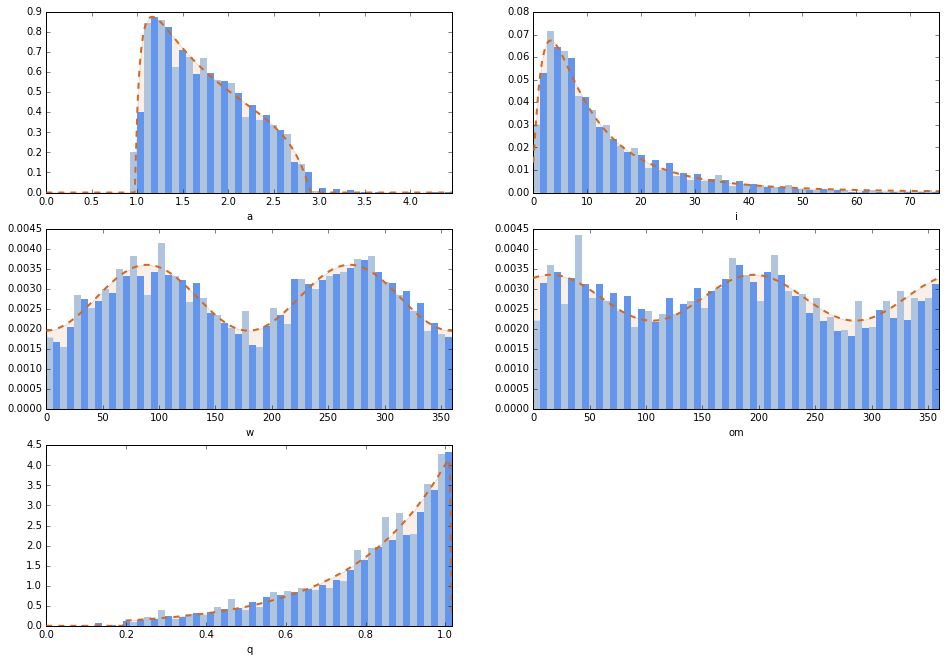

In [11]:

go.plot_param_distributions(distlist, names, figsize=(16, 11))

In [12]:
#ss.rv_continuous??


In [13]:
#ss.gaussian_kde??